# Clustering with mean pooled embeddings

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import umap
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/similar_cases/512_embeddings.json'

df = pd.read_json(file_path)

df["mean_embedding"] = df["mean_embedding"].apply(lambda x: np.array(x, dtype=np.float32))
df["max_embedding"] = df["max_embedding"].apply(lambda x: np.array(x, dtype=np.float32))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
NUM_CLUSTERS = 10
MIN_CLUSTER_SIZE = 5

In [6]:
X = np.vstack(df["mean_embedding"].values)

pca = PCA(n_components=2)
X_mean_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_mean_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_mean_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["mean_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["mean_hdbscan_cluster"] = hdb.fit_predict(X)

In [8]:
df.head()

,opinion_id,opinion,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster
0,4200405,DISTRICT COURT OF APPEAL OF THE STATE OF FLOR...,"[0.037726916, -0.026201373, 0.03172675, -0.005...","[0.037726916, -0.026201373, 0.03172675, -0.005...",1,-1
1,2251008,889 N.E.2d 809 (2005) 356 Ill. App.3d 1130 PEO...,"[-0.013696559, -0.012703155, 9.06616e-05, 0.00...","[-0.013696559, -0.012703155, 9.06616e-05, 0.00...",6,-1
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...","[-0.017409725, 0.016606685, 0.05377047, 0.0209...","[-0.017409725, 0.016606685, 0.05377047, 0.0209...",7,-1
3,2790710,Twersky v Incorporated Vil. of Great Neck ( 2...,"[-0.008887433, 0.05771011, 0.010791849, -0.010...","[-0.008186012, 0.06381394, 0.0179507, 0.002099...",8,1
4,1470544,951 A.2d 180 (2008) Philip S. HORNER v. GOVERN...,"[0.017243769, 0.038634527, 0.040518142, -0.010...","[0.036437504, 0.04810441, 0.051111925, 0.00694...",9,-1


In [9]:
df["mean_hdbscan_cluster"].nunique()

8

# Clustering with max pooled embeddings

In [10]:
X = np.vstack(df["max_embedding"].values)

pca = PCA(n_components=2)
X_max_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_max_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_max_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["max_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["max_hdbscan_cluster"] = hdb.fit_predict(X)

In [12]:
df.head()

,opinion_id,opinion,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster,max_kmeans_cluster,max_hdbscan_cluster
0,4200405,DISTRICT COURT OF APPEAL OF THE STATE OF FLOR...,"[0.037726916, -0.026201373, 0.03172675, -0.005...","[0.037726916, -0.026201373, 0.03172675, -0.005...",1,-1,6,-1
1,2251008,889 N.E.2d 809 (2005) 356 Ill. App.3d 1130 PEO...,"[-0.013696559, -0.012703155, 9.06616e-05, 0.00...","[-0.013696559, -0.012703155, 9.06616e-05, 0.00...",6,-1,7,-1
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...","[-0.017409725, 0.016606685, 0.05377047, 0.0209...","[-0.017409725, 0.016606685, 0.05377047, 0.0209...",7,-1,2,-1
3,2790710,Twersky v Incorporated Vil. of Great Neck ( 2...,"[-0.008887433, 0.05771011, 0.010791849, -0.010...","[-0.008186012, 0.06381394, 0.0179507, 0.002099...",8,1,8,0
4,1470544,951 A.2d 180 (2008) Philip S. HORNER v. GOVERN...,"[0.017243769, 0.038634527, 0.040518142, -0.010...","[0.036437504, 0.04810441, 0.051111925, 0.00694...",9,-1,3,0


In [13]:
df["max_hdbscan_cluster"].nunique()

6

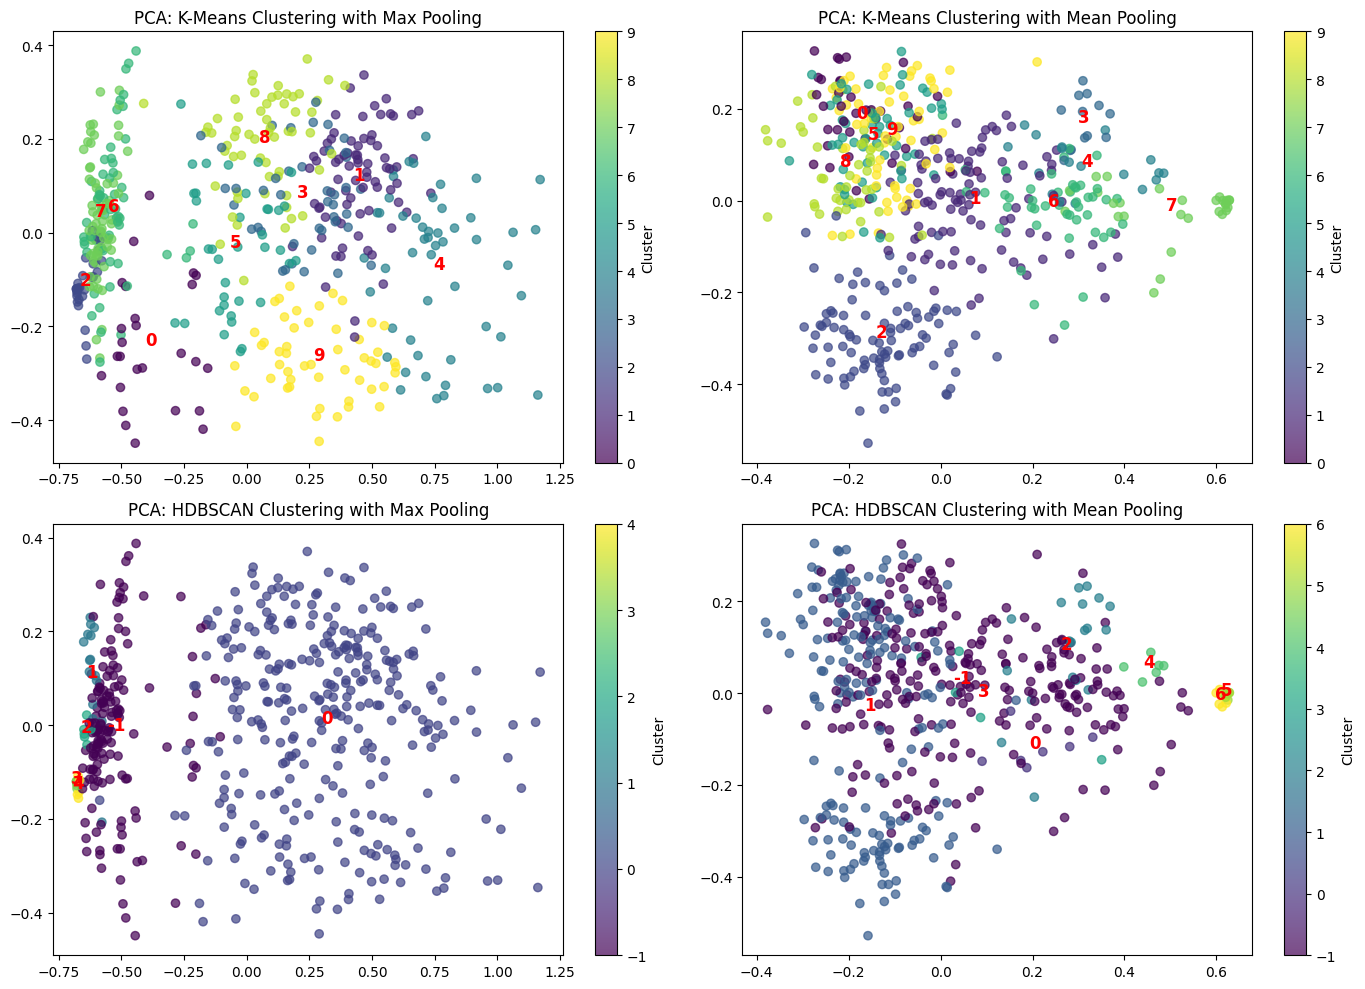

In [14]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["PCA: K-Means Clustering with Max Pooling", "PCA: K-Means Clustering with Mean Pooling",
          "PCA: HDBSCAN Clustering with Max Pooling", "PCA: HDBSCAN Clustering with Mean Pooling"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right PCA results
    X_pca = X_max_pca if "max" in cluster_col else X_mean_pca
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_pca[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

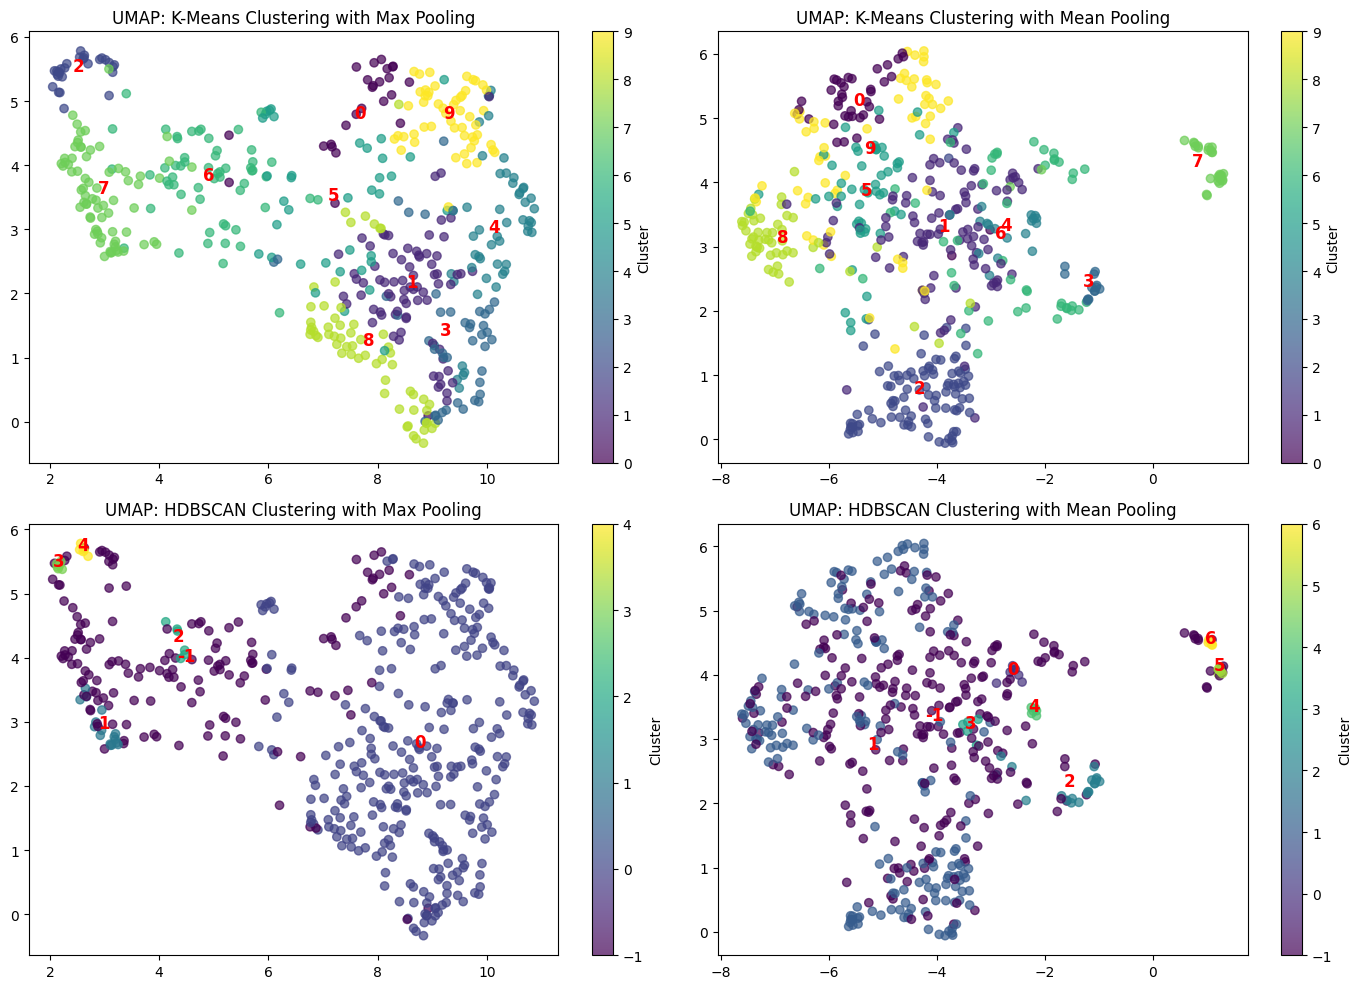

In [15]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["UMAP: K-Means Clustering with Max Pooling", "UMAP: K-Means Clustering with Mean Pooling",
          "UMAP: HDBSCAN Clustering with Max Pooling", "UMAP: HDBSCAN Clustering with Mean Pooling"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right UMAP results
    X_umap = X_max_umap if "max" in cluster_col else X_mean_umap
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_umap[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

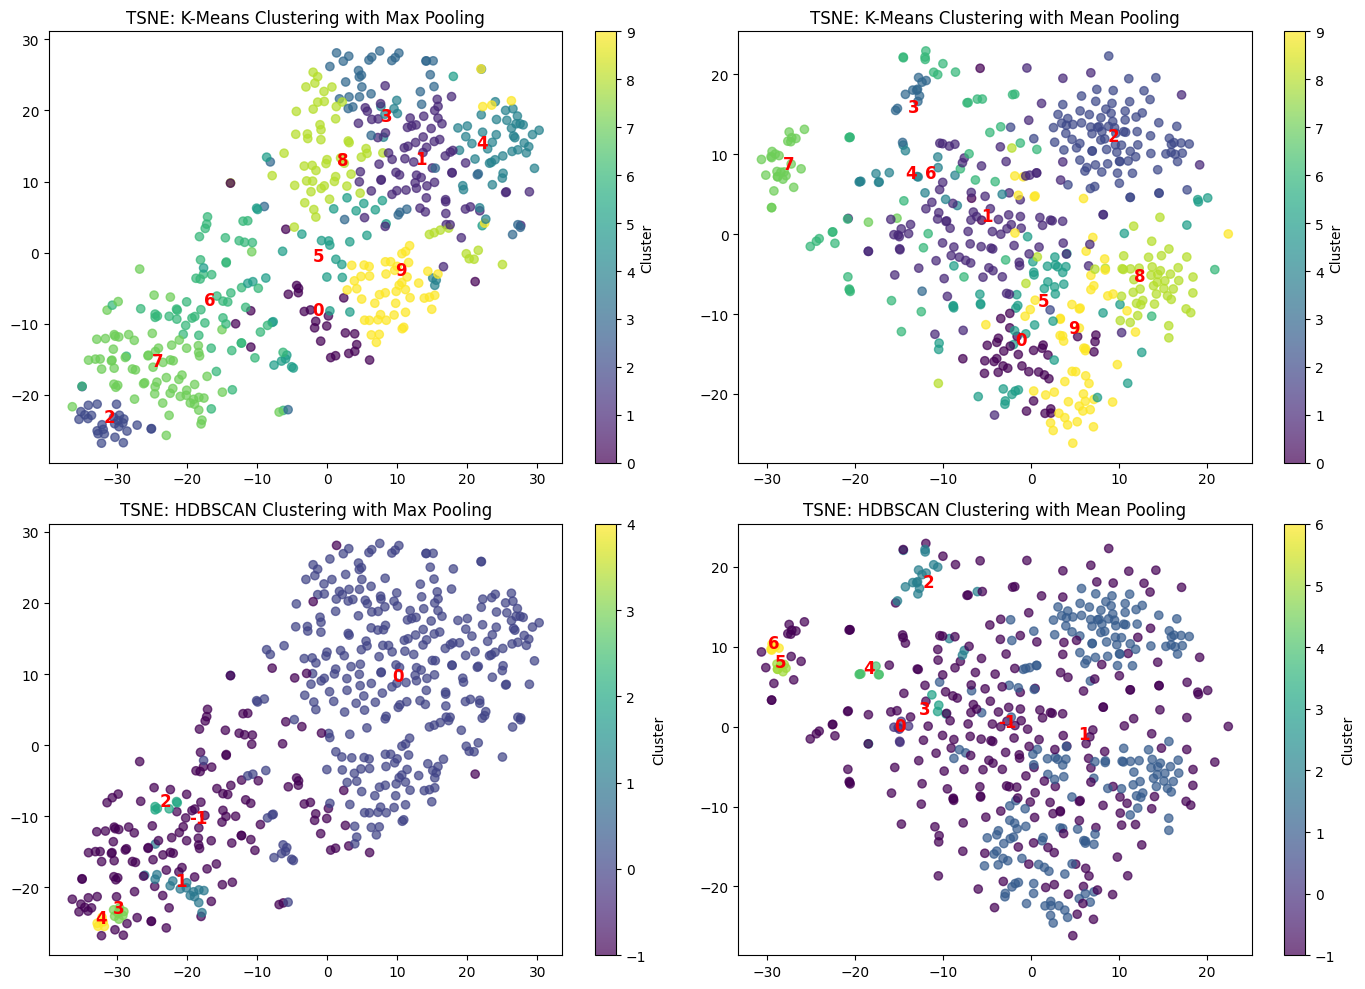

In [16]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["TSNE: K-Means Clustering with Max Pooling", "TSNE: K-Means Clustering with Mean Pooling",
          "TSNE: HDBSCAN Clustering with Max Pooling", "TSNE: HDBSCAN Clustering with Mean Pooling"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right TSNE results
    X_tsne = X_max_tsne if "max" in cluster_col else X_mean_tsne
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_tsne[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [17]:
from google.colab import drive
drive.mount('/content/drive')

df = df[["opinion_id", "opinion", "max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]]

file_path = '/content/drive/MyDrive/similar_cases/512_clusters.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/similar_cases/512_clusters.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df[(df["max_kmeans_cluster"] == 2) & (df["mean_kmeans_cluster"] == 7)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...",2,7,-1,-1
17,8388881,Petition for writ of certiorari to the Court o...,2,7,-1,-1
21,8940245,Supreme Court of Appeals of Virginia. Certior...,2,7,-1,-1
32,9060053,C. A. 9th Cir. Certiorari denied.,2,7,3,5
37,8143875,Petition for a writ of certiorari to the Circ...,2,7,4,6
81,9126946,Ct. Crim. App. Okla. Certiorari denied.,2,7,-1,-1
90,9079900,C. A. 5th Cir. Certiorari denied.,2,7,3,5
93,7275037,Petition for writ of certiorari to the United...,2,7,4,6
100,2631526,249 P.3d 623 (2010) 170 Wash.2d 1024 STATE v. ...,2,7,-1,-1
102,8928102,*828C. A. 2d Cir. Certiorari denied.,2,7,3,5


In [23]:
df[(df["max_kmeans_cluster"] == 9) & (df["mean_kmeans_cluster"] == 2)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
22,4364341,MEMORANDUM DECISION Pursuant to Ind. Appellate...,9,2,0,-1
23,9627650,"JOHNSON, J., concurring. In the Penal Code, t...",9,2,0,-1
28,4090781,"[Cite as State v. Vaughn, 2016-Ohio-7384.] STA...",9,2,0,1
34,1355714,112 Wash. 2d 303 (1989) 771 P.2d 350 THE STATE...,9,2,0,1
53,6815344,"Sims, J., after making the foregoing statemen...",9,2,0,1
70,1494869,391 F. Supp. 186 (1975) Brian Mark BURKE et al...,9,2,0,-1
86,8641995,"DECISION ABRAMS, Chief Judge: Tried by specia...",9,2,0,1
99,37964,United States Court of Appeals Fifth Circuit ...,9,2,0,1
119,1997659,708 A.2d 192 (1998) STATE of Vermont v. Richar...,9,2,0,1
121,760653,165 F.3d 33 NOTICE: Seventh Circuit Rule 53(b)...,9,2,0,1


In [26]:
df[(df["max_kmeans_cluster"] == 7) & (df["mean_kmeans_cluster"] == 6)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
1,2251008,889 N.E.2d 809 (2005) 356 Ill. App.3d 1130 PEO...,7,6,-1,-1
29,5228821,Judgment of conviction of the County Court of...,7,6,1,2
52,7638249,Affirmed.,7,6,-1,-1
56,340983,546 F.2d 413 U. S. v. Savino No. 76-1021 Unite...,7,6,-1,-1
71,8228083,Unpublished Decision. Citation to unpublished ...,7,6,-1,-1
113,4986073,"CP-51-DP-0001451-2016, . .FID: 51-FN-001660-2...",7,6,-1,-1
118,1108818,993 So.2d 534 (2008) BISSO v. STATE. No. 4D07-...,7,6,-1,-1
120,1599093,3 So.3d 961 (2007) EX PARTE A.W.P. No. 1060345...,7,6,-1,-1
125,365034,595 F.2d 1211 20 Fair Empl.Prac.Cas. 1691 Dorl...,7,6,-1,-1
130,326000,511 F.2d 1406 L'Italien v. U. S. 73-2097 UNITE...,7,6,-1,-1
